# Data Fundamentals (H)
John H. Williamson / Sebastian Stein -- Session 2023/2024

----

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

---

## Lab 3: Unassessed
# Scientific visualisation


### Notes
I recommend reading the lecture notes supplement *Criticising Visualisations* on Moodle as a quick reference summary. 

**This exercise is not assessed**. Completion may help you in the course, but you will not get a mark for this lab and this does not contibute to your grade. You can ask for feedback in labs if you wish.

<div class="alert alert-box alert-danger">
    
It is strongly recommended to at least complete the worked tutorial, so you can competently use Matplotlib.

</div>

### References
If you are stuck, the following resources are very helpful:

* [Introduction to Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Matplotlib command summary](https://matplotlib.org/api/pyplot_summary.html)




In [1]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy

%matplotlib notebook
%matplotlib notebook

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
print("Everything imported OK")


Everything imported OK


## Purpose of this lab
This lab should help you:
* understand how to use Matplotlib for basic plotting tasks
* create simple, clean and correct 2D plots of two variables 
* create plots with multiple conditions
* plot basic statistics of datasets, representing uncertainty appropriately
* explicitly criticise existing visualisations and  suggest and implement concrete suggestions to improve them


# matplotlib Tutorial
We'll go through the first example from the lecture notes. You'll need to apply these ideas yourself later, so make sure you understand what happens here. 

In this example, the plotting commands are split up among notebook cells so that each step can be explained. In your code, just have all of the commands in one cell, to avoid having to scroll up and down as you make changes.

## Some data
This data is synthetic. It's a simple trigonometric function; the details don't particularly matter.

In [2]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

## generate an x value to be transformed
x = np.linspace(-3*np.pi, 3 * np.pi, 500)

## Figures
To begin any plotting we must create a **figure**, which is a "blank canvas" onto which we can add visualisations. 
<div class="alert alert-info">
    
**Important: the visualisation will always appear in the output of whichever cell has the `plt.figure()` call.** As a consequence, all of the commands below will affect in the output of the cell below -- **you will need to scroll up to see what is going on!**
    
</div>

When you go through the various steps below, scroll back up to this cell to see their effect. Note that usually all plotting commands go in *one* cell, so we don't end up scrolling about.

<IPython.core.display.Javascript object>


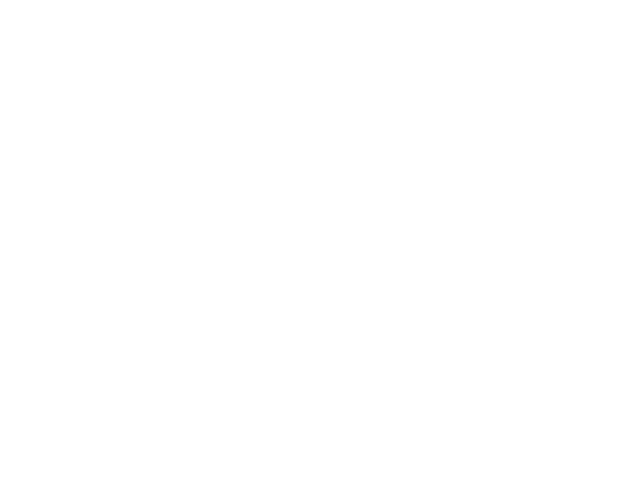

In [3]:
fig = plt.figure()  # create a new figure. It will be blank.

## If you want a different size of figure, you can use:
# fig = plt.figure(figsize=(3,3)) # quite small
# the default size set here is good for this exercise

## Axes
To draw anything, we must define **axes**. Each axes is a facet of a plot. It has a coordinate system which can be used to draw data. 

The call to create a new axis is formatted `fig.add_subplot(rows, columns, index)` which will create a subplot in a matrix of axes indexed by the index. The index increases column-wise, then row-wise, and starts from *1* (not 0!)

For example, we could create a 3x2 array of plots, and select the middle-left plot
using `plt.add_subplot(3, 2, 3)`

        --------
       | 1 | 2 |
       | 3 | 4 |
       | 5 | 6 |
       ---------

Most of the time, though, we just want one axes that fills the figure and `fig.add_subplot(1,1,1)` does that. The object it returns is what we use for all subsequent plotting.

In [4]:
ax = fig.add_subplot(1, 1, 1)  
# create a new subplot, returning a set of axes
# look above ^ ^ at the figure. You should see the axes appear


We make a line plot of `x` against `f(x, k)` for a few fixed values of `k`.
Each subsequent plot will be a new color, and all of the plots will be overlaid on the axes

`ax.plot(x,y)` is the basic line plotting command. It is called on an axes object.

Note that the `label=` gives a label that the `legend` command will use to label the graph afterwards. Always label plots if you want readers to be able to distinguish them.

In [5]:
ax.cla()  # cla means to CLear Axes. 
# it does nothing the first time we run it, but it will clear the plot and redraw if
# you run this cell multiple times. Try commenting it out and running this cell twice!


ax.plot(x, pulse(x,1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# you can adjust the styling of the plot manually: 
#   here the color is black ("k") 
#   and the linestyle is dotted (":")
ax.plot(x, pulse(x, 500), label='k=500', color='k', linestyle=':')

## note that there are several built-in colors called
# C0, C1, C2, C3, C4, C5, and C6
# they will generally look good
# try changing the 'k' above to 'C6'

**Look above to see the result**. Notice the different colouring. Repeated plots on one axis create new **layers** in the visualisation.

Now we can add **labels** to the plot. There should always be a label for the x-axis, y-axis and a title for the axes. We should also have a **legend** if multiple layers are used. `ax.legend()` will draw one. It can be configured in many ways, but the defaults are fine here.

In [6]:
# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")        # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls, like ax.plot(x,y, label="xy")
ax.legend()

By default, the scaling of the axis will be adjusted to fit the data. This isn't always a good idea, so you can adjust it manually. The axis limits are set by `ax.set_xlim(min,max)` and `ax.set_ylim(min,max)` and these adjust the scaling of the axes. This configures the **coords** used to draw data.

You can try changing these to see different parts of the curve.

**Note that you don't need to call the plot commands again when you update the axis limits.**

In [7]:
## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

(-0.25, 1.2)

### Tweaking
We can tweak the plot in many ways. Try some of the below.

In [8]:
# grid 
ax.grid(True) # or False to turn it off

In [9]:
# frame
ax.set_frame_on(False) # or True to turn it back on

In [10]:
ax.set_xticks([-10, -5, 0, 5, 10]) # Tick positions on the x axis
ax.set_yticks([0,0.5,1.0]) # and on the y-axis

In [11]:
# this is a fancier tick adjustment
# Tick positions on the x axis
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]) 

# we can relabel the ticks using the same order. 
# LaTeX formulae work if inside $ symbols
ax.set_xticklabels(["$-2\pi$", "$-\pi$", "0",
                    "$\pi$", "$2\pi$"])

[Text(-6.283185307179586, 0, '$-2\\pi$'),
 Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(0.0, 0, '0'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

In [12]:
# RUN THIS to switch back to static plots, before doing the rest of this exercise

%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Simple plots

For these exercises, you need to plot graphs showing the data which is provided to you. You need to:
    
* choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice.
* plot the data correctly
* make sure all the details are sensible (axes, labelling, etc.)

You will get the name of the file with the data, along with a comment that explains the format of the data. You can use `np.loadtxt()` to load the datasets.



A)
* Data file: `data/cherry_trees.txt`
* Description: Height and lumber volume of black cherry trees  measured in an orchard.
* Columns:
  
        Height (ft)  Lumber volume (ft^3)

Note: plot your graph in **metric units**. 1 ft = 0.3048m
       
    

<IPython.core.display.Javascript object>


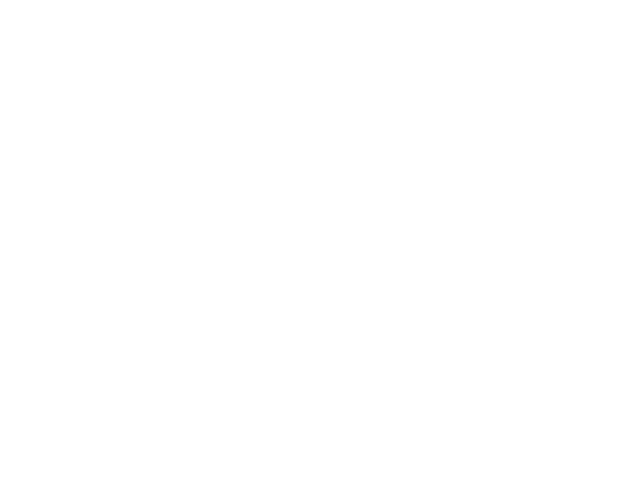

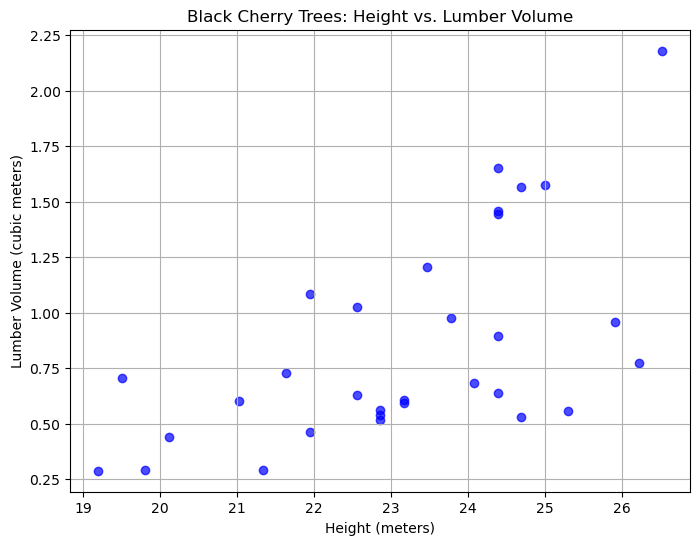

In [13]:
# YOUR CODE HERE
data = np.loadtxt('data/cherry_trees.txt')

height_in_m = data[:, 0] * 0.3048
lumber_vol_m3 = data[:, 1] * 0.02831685

plt.figure(figsize = (8,6))
plt.scatter(height_in_m, lumber_vol_m3, marker='o', color='b',alpha=0.7)

plt.xlabel('Height (meters)')
plt.ylabel('Lumber Volume (cubic meters)')
plt.title('Black Cherry Trees: Height vs. Lumber Volume')

plt.grid(True)
plt.show()

B)
* Data file: `data/air_passengers.txt`
* Description: The number of international air passengers, each month, 1949 to 1960.
* Columns:

      year   passenger_count


AttributeError: Text.set() got an unexpected keyword argument 'rotataion'

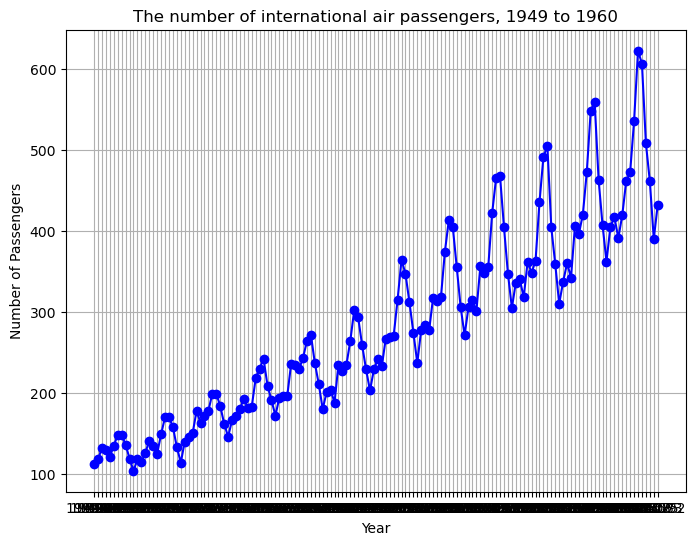

In [14]:
# YOUR CODE HERE
data = np.loadtxt('data/air_passengers.txt')

plt.figure(figsize = (8,6))
plt.plot(data[:, 0], data[:, 1], marker='o', color='b', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('The number of international air passengers, 1949 to 1960')


plt.grid(True)
plt.xticks(data[:, 0], rotataion = 45)
plt.show()

C) 
* Data file: `data/rivers.txt`
* Description: Length of major rivers in the United States (miles)
* Columns:
   
       river_length



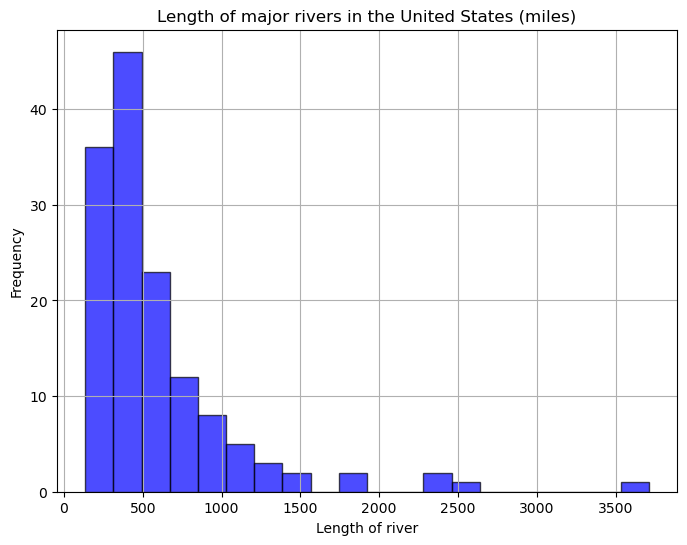

In [15]:
# YOUR CODE HERE

data = np.loadtxt('data/rivers.txt')

plt.figure(figsize = (8,6))
plt.hist(data, bins=20, color='b', edgecolor='black', alpha=0.7)

plt.xlabel('Length of river')
plt.ylabel('Frequency')
plt.title('Length of major rivers in the United States (miles)')


plt.grid(True)
plt.show()

# 3. Some uncertainty 

You are provided with data on the effect of five insecticide sprays on populations of pest insects. Compare and contrast these sprays, **appropriately representing uncertainty**.


* Data file: `data/insects.txt`
* Description: The counts of insects on each leaf of a plant in agricultural experimental units treated with
different insecticides.
* Columns:

            insect_count spray_id (0-5)


* Plot the data, on three separate figures, using:
    * A simple bar chart of the mean insect counts (grouped by spray).
    * A barchart showing the mean counts (grouped), and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the [`plt.bar` documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)). The standard deviation of an array can be computed by `np.std(x, axis)`, just like `np.mean()`.
    * A Box plot of the insect counts.

* Mark the ticks on the x axis using the names of the sprays.

        0 = Insecticator
        1 = Placebo
        2 = BuzzNoMore
        3 = Aprotex
        4 = DieOff

* For this section, you don't need to write the caption. Assume the caption is:

> Effectiveness of insecticides in a farm environment. Five different aerosol insecticides were tested.



In [16]:

# load and group the data
# YOUR CODE HERE
data = np.loadtxt('data/insects.txt')
insect_count = data[:, 0]
spray_id = data[:, 1]

spray_names = [
    'Insecticator', 
    'Placebo',
    'BuzzNoMore',
    'Aprotex',
    'DieOff'
]

insect_counts_grouped_by_spray = {i: [] for i in range(5)}
for i in range(5):
    insect_counts_grouped_by_spray[i] = insect_count[spray_id == i]
    
mean_counts = [np.mean(insect_counts_grouped_by_spray[i]) for i in range(5)]

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

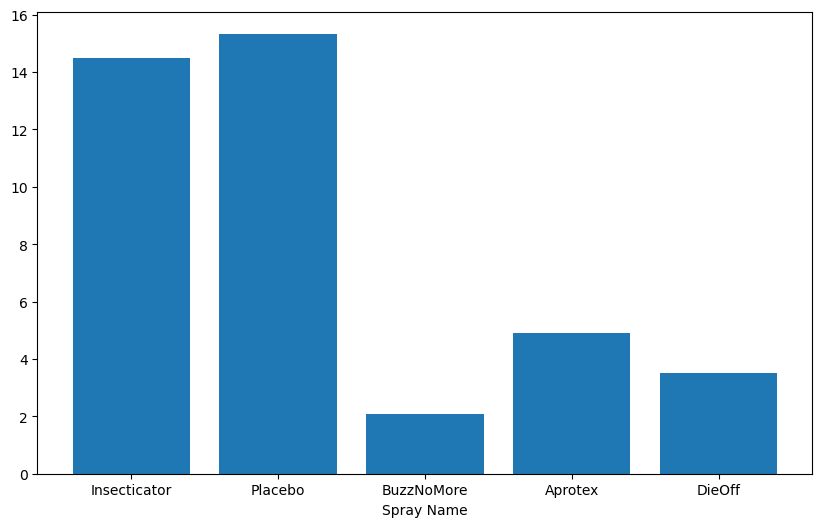

In [17]:

# plot the means
# YOUR CODE HERE
  
plt.figure(figsize = (10, 6))
plt.bar(spray_names, mean_counts)
plt.xlabel("Spray Name")
plt.ylabel


In [ ]:

# plot the means with std. devs.
# YOUR CODE HERE

In [ ]:
# box plot
# YOUR CODE HERE

# 4. Constructively criticising visualisations 
The visualisations below are bad. Find ways to improve them so that the result is clearer.



## A: Earthquakes in California

* Dataset: Acceleration measurements at seismic stations placed around California, measuring the peak acceleration experienced during earthquakes, along with the distance of the station to the hypocenter of that earthquake.
* File: `data/cali_earthquakes.txt`
* Columns

       earthquake_id magnitude(Richter) station_id distance_to_hypocenter(km) acceleration(g) 

* Caption:

>    This plot shows the variation in acceleration at seismic monitoring stations as a function of distance to hypocentre of earthquakes in California. More distant stations measure smaller signals with some variation according to the strength of the originating earthquake.
    


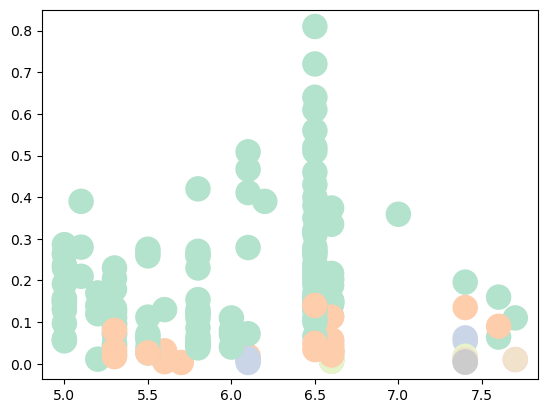

In [18]:
earthquakes = np.loadtxt("data/cali_earthquakes.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# name columns
earthquake, mag, station, distance, accel = [0,1,2,3,4]
plt.scatter(earthquakes[:,mag], earthquakes[:, accel], c=earthquakes[:, distance], cmap='Pastel2', s=300)


<Figure size 640x480 with 0 Axes>

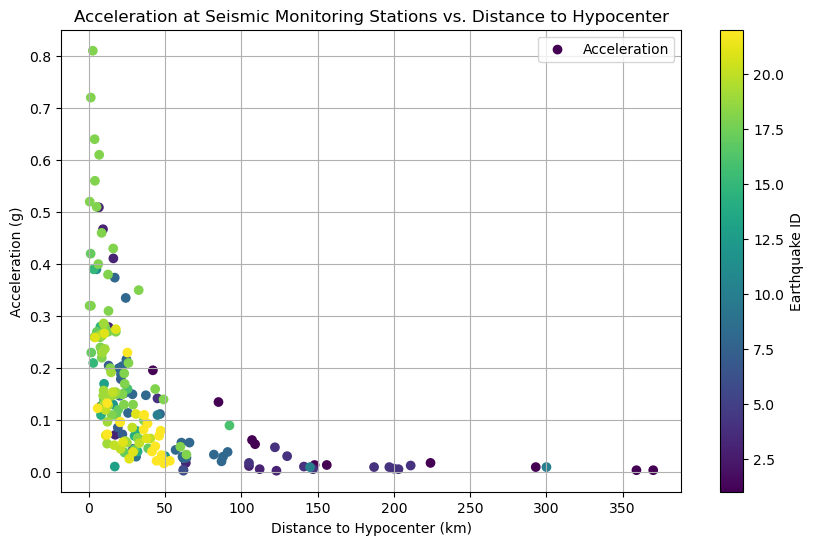

In [21]:
# YOUR CODE HERE
plt.tight_layout()
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('data/cali_earthquakes.txt', skiprows=1)

# Extract columns for distance to hypocenter and acceleration
distance = data[:, 3]  # Distance is in the 4th column (index 3)
acceleration = data[:, 4]  # Acceleration is in the 5th column (index 4)

# Plot acceleration vs. distance
plt.figure(figsize=(10, 6))
plt.scatter(distance, acceleration, c=data[:, 0], cmap='viridis', label='Acceleration')
plt.colorbar(label='Earthquake ID')
plt.xlabel('Distance to Hypocenter (km)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration at Seismic Monitoring Stations vs. Distance to Hypocenter')
plt.grid(True)
plt.legend()
plt.show()


## B: Reaction times and sleep

* Dataset: The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject.

* File `data/sleep_study.txt`
* Columns

         reaction time (ms)    sleep_deprivation (days)  subject_id (id)

* Caption:
> This plot shows how visual reaction time varies as subjects are deprived of sleep. Up to 10 days of sleep deprivation were tested.
    


Text(0.5, 0, 'Reaction time')

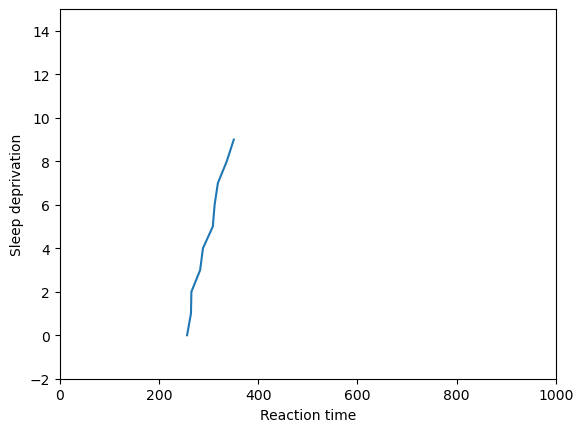

In [22]:
sleep_study = np.loadtxt("data/sleep_study.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
reaction, sleep, subject = 0,1,2

# group each day
grouped = np.array([sleep_study[sleep_study[:,sleep]==i] for i in range(10)])
# take mean for each day and plot it
mean_reactions = np.mean(grouped, axis=1)[:,0] 
ax.plot(mean_reactions, np.arange(10))

# adjust axes
ax.set_xlim(0,1000)
ax.set_ylim(-2, 15)

ax.set_ylabel("Sleep deprivation")
ax.set_xlabel("Reaction time")

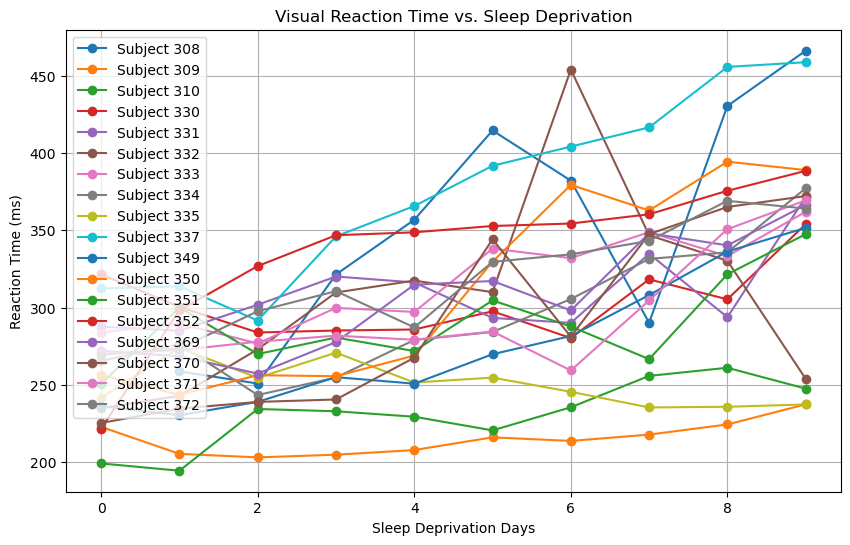

In [23]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('data/sleep_study.txt', skiprows=1)

# Extract columns for reaction time and sleep deprivation days
reaction_time = data[:, 0]  # Reaction time is in the 1st column (index 0)
sleep_deprivation_days = data[:, 1]  # Sleep deprivation days is in the 2nd column (index 1)
subject_ids = data[:, 2]  # Subject IDs are in the 3rd column (index 2)

# Get unique subject IDs
unique_subject_ids = np.unique(subject_ids)

# Plot reaction time vs. sleep deprivation days for each subject
plt.figure(figsize=(10, 6))
for subject_id in unique_subject_ids:
    mask = (subject_ids == subject_id)
    plt.plot(sleep_deprivation_days[mask], reaction_time[mask], marker='o', label=f'Subject {int(subject_id)}')

plt.xlabel('Sleep Deprivation Days')
plt.ylabel('Reaction Time (ms)')
plt.title('Visual Reaction Time vs. Sleep Deprivation')
plt.grid(True)
plt.legend()
plt.show()


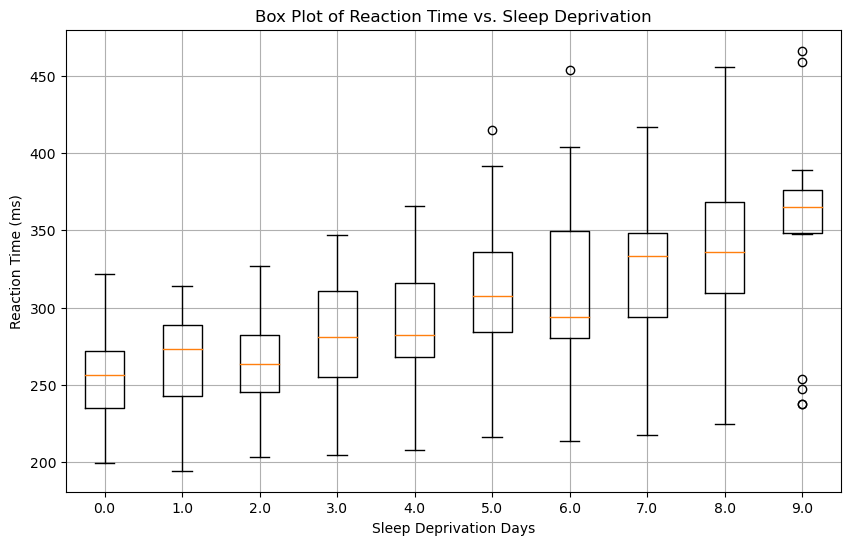

In [24]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('data/sleep_study.txt', skiprows=1)

# Extract columns for reaction time and sleep deprivation days
reaction_time = data[:, 0]  # Reaction time is in the 1st column (index 0)
sleep_deprivation_days = data[:, 1]  # Sleep deprivation days is in the 2nd column (index 1)

# Create a dictionary to store reaction times for each sleep deprivation day
reaction_times_dict = {}
for i, day in enumerate(sleep_deprivation_days):
    if day not in reaction_times_dict:
        reaction_times_dict[day] = []
    reaction_times_dict[day].append(reaction_time[i])

# Create a list of reaction time data grouped by sleep deprivation days
reaction_times_grouped = [reaction_times_dict[day] for day in sorted(reaction_times_dict.keys())]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(reaction_times_grouped, labels=sorted(reaction_times_dict.keys()))
plt.xlabel('Sleep Deprivation Days')
plt.ylabel('Reaction Time (ms)')
plt.title('Box Plot of Reaction Time vs. Sleep Deprivation')
plt.grid(True)
plt.show()